In [1]:
#Dependecies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Part 1: Prepare the Data ##

In [2]:
#Read csv into Pandas DF
file_path = "Resources/myopia.csv"
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df["MYOPIC"].nunique()

2

In [4]:
labels = df["MYOPIC"]
labels.value_counts().nunique()

2

In [5]:
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [6]:
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [7]:
df.shape

(618, 15)

In [8]:
#Checking for nulls and duplicates
df.isna().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Split the dataframe into data and target
y = df["MYOPIC"].values
X = df.drop("MYOPIC", axis=1)

In [11]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

## Part 2: Apply Dimensionality Reduction ##

In [20]:
# Perform PCA
# Initialize PCA model preserving 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
evr = pca.explained_variance_ratio_
print(evr.sum())

0.9187361702915194


The sum of the explained variance ratio for all the principal components is 0.9187361702915188, which means that 91.87% of the total variance in the data is explained by the first 10 principal components. This is a relatively high value, which suggests that the first 10 principal components contain most of the information in the data.

In [21]:
print(X_pca.shape)

(618, 10)


#### Number of features changed from 15 to 10 ####

C:\Users\amudd\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.010s...
[t-SNE] Computed neighbors for 618 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.179932
[t-SNE] KL divergence after 1350 iterations: 1.063978


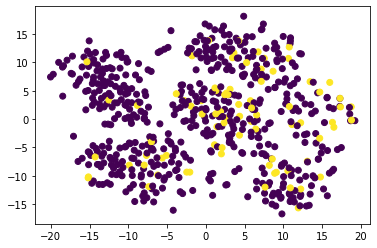

In [22]:
from sklearn.manifold import TSNE

# Perform t-SNE on the principal components
tsne = TSNE(n_components=2, learning_rate = 250, perplexity=50, verbose=1, n_iter=2500)
tsne_features = tsne.fit_transform(X_pca)
# Visualize the results
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=y)
plt.show()

## Part 3: Perform a Cluster Analysis with K-means ##